In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load Data

In [2]:
base_dir = '/kaggle/input/what-bird-would-i-see/'

X_train = np.loadtxt(base_dir + 'train_features.csv', skiprows=1, delimiter=',')
X_test = np.loadtxt(base_dir + 'test_features.csv', skiprows=1, delimiter=',')

y_train = np.loadtxt(base_dir + 'train_values.csv', skiprows=1, delimiter=',').astype('int32')

# handle ID column
X_train = X_train[:,1:]
y_train = y_train[:,1:]
X_test_labels = X_test[:,(0,)]
X_test = X_test[:,1:]

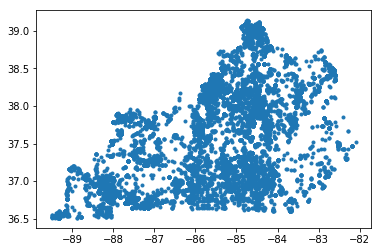

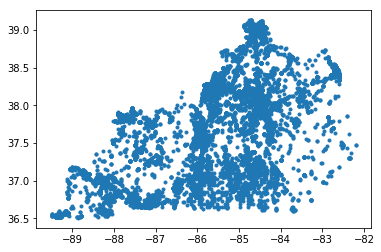

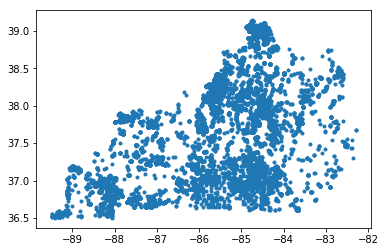

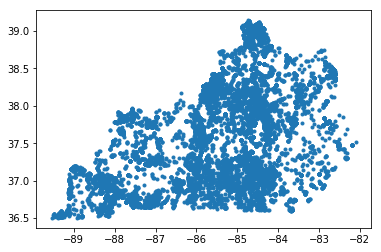

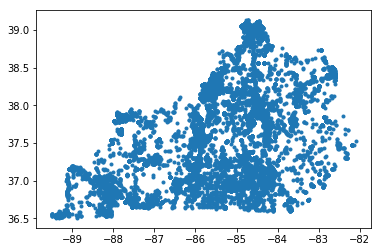

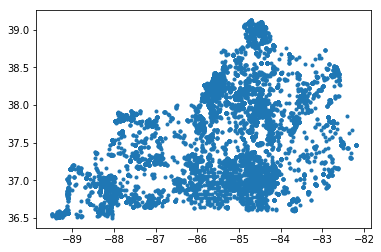

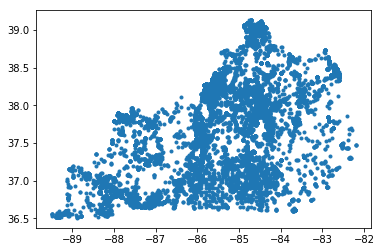

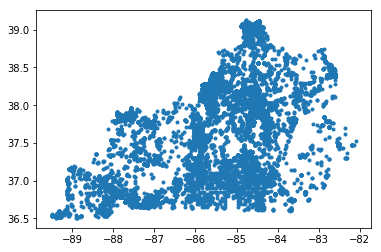

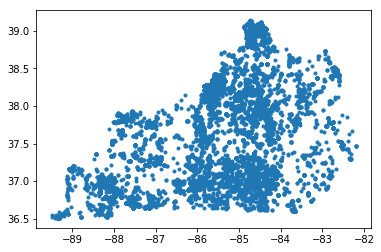

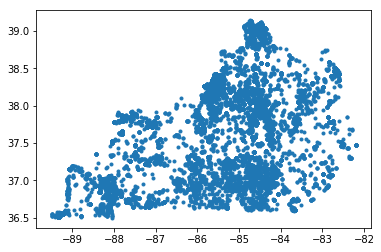

In [3]:
# show the spatial distribution of the first ten species
for i in range(10):
    plt.figure()
    plt.plot(X_train[y_train.flatten()==i,1], X_train[y_train.flatten()==i,0], '.');

# Train Model

In [9]:
clf = RandomForestClassifier(n_estimators=100, max_depth=8, n_jobs = 1, bootstrap=True, criterion='entropy',random_state =1000,max_features = "sqrt",min_samples_split = 2, min_samples_leaf = 1)
#clf = RandomForestClassifier(n_estimators=100, max_depth=8)
feats = (0,1) # only use location features
clf.fit(X_train[:,feats],y_train.flatten())
print(clf.score(X_train[:,feats],y_train))

0.1523160957356567


In [10]:
#y_preds = clf.predict_proba(X_test)
y_preds = clf.predict(X_test[:,feats])[:,np.newaxis]

output = np.concatenate((X_test_labels,y_preds), axis=1)
np.savetxt('submission_random_forest2.csv', output, header='ID,speciesKey', fmt='%i', delimiter=',')